In [ ]:
!pip install requests
!pip install beautifulsoup4
!pip install pandas
!pip install matplotlib

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def clean_price(price_str):
    # Remove unwanted characters and strip whitespace
    price_str = price_str.replace('Â£', '').strip()
    return float(price_str)

In [ ]:
def scrape_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    books = []
    for article in soup.find_all('article', class_='product_pod'):
        title = article.h3.a['title']
        price = article.find('p', class_='price_color').text
        rating = article.p['class'][1]

        # Append book details to the list
        books.append({
            'title': title,
            'price': clean_price(price),
            'rating': rating
        })
    return books

In [ ]:
def scrape_books(base_url, num_pages):
    all_books = []
    for page in range(1, num_pages + 1):
        url = f"{base_url}/catalogue/page-{page}.html"
        books = scrape_page(url)
        all_books.extend(books)
    return all_books

                                   title  price rating
0                   A Light in the Attic  51.77  Three
1                     Tipping the Velvet  53.74    One
2                             Soumission  50.10    One
3                          Sharp Objects  47.82   Four
4  Sapiens: A Brief History of Humankind  54.23   Five
Average price of books: £34.56

Rating distribution:
rating
Three    22
One      22
Five     19
Two      19
Four     18
Name: count, dtype: int64


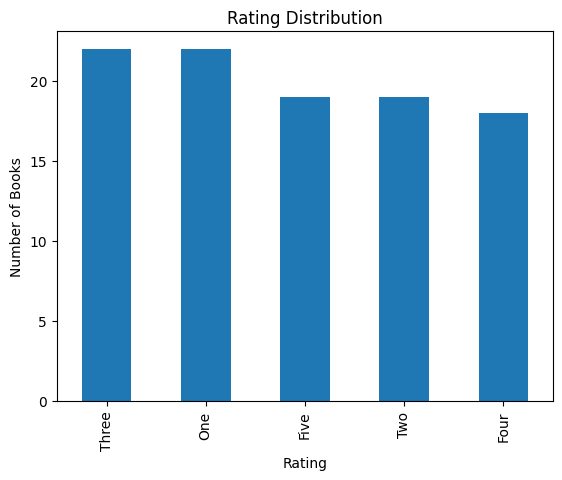

In [ ]:
if __name__ == "__main__":
    # Define base URL and number of pages to scrape
    base_url = 'http://books.toscrape.com'
    num_pages = 5  # Number of pages to scrape

    # Scrape book data
    books_data = scrape_books(base_url, num_pages)
    df = pd.DataFrame(books_data)

    # Display the first few rows of the DataFrame
    print(df.head())

    # Basic Statistics
    average_price = df['price'].mean()
    print(f'Average price of books: £{average_price:.2f}')

    # Rating distribution
    rating_counts = df['rating'].value_counts()
    print('\nRating distribution:')
    print(rating_counts)

    # Plotting the rating distribution
    rating_counts.plot(kind='bar', title='Rating Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Number of Books')
    plt.show()